Get started with a simplest LLM application. Overall task is to understand what is going on in an image. Given an image as input and a text query, receive a reponse in text. Two step process -

    - single LLM call
    - simple prompting
    

tools used - 

    - large language model - Google Gemini

    - Using PromptTemplates and OutputParsers

    - Using LangChain Expression Language (LCEL) to chain components together


tutorial followed from - https://python.langchain.com/v0.1/docs/integrations/chat/google_generative_ai/#multimodal-support


# setup

In [1]:
import getpass
import os

# os.environ["LANGCHAIN_TRACING_V2"] = "true"
# os.environ["LANGCHAIN_API_KEY"] = getpass.getpass("LANGCHAIN_API_KEY")
os.environ["GOOGLE_API_KEY"] = getpass.getpass("GOOGLE_API_KEY")

GOOGLE_API_KEY········


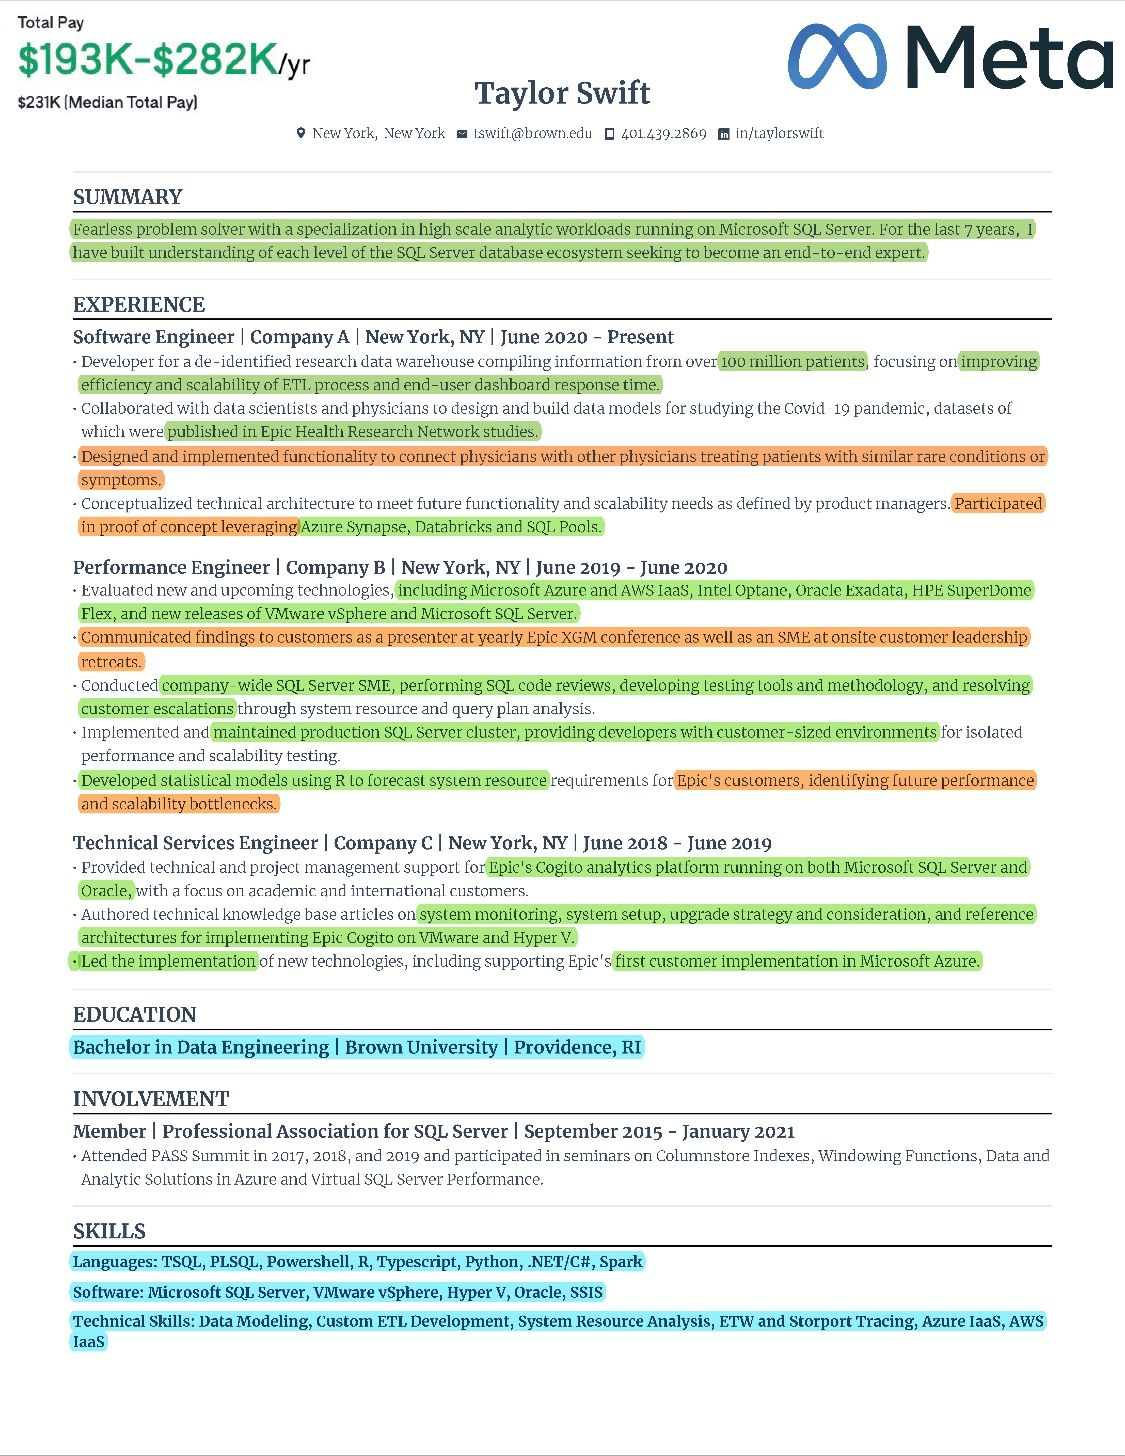

In [2]:
import requests
from IPython.display import Image

# get images online
# image_url = "https://picsum.photos/seed/picsum/300/300"
# content = requests.get(image_url).content

# or use local images
image = r"C:\localPath\resume\screenshot.jpg"
Image(image)

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()

model = ChatGoogleGenerativeAI(model="gemini-pro-vision", 
                               convert_system_message_to_human=True)

messages = [
    SystemMessage(content="I am blind and you are helping me see the world."),
    HumanMessage(content=[{"type":"text", "text":"What's in this image?"},
                          {"type":"image_url", "image_url":image}
                         ]),
]

chain = model | parser
chain.invoke(messages)

" The image is a screenshot of a job posting for a Data Engineer at Meta. The job posting lists the following qualifications:\n\n- Bachelor's degree in Data Engineering or a related field\n- 5+ years of experience in data engineering\n- Experience with SQL, Python, and Java\n- Experience with AWS, Azure, and Google Cloud Platform\n- Experience with data warehousing, data modeling, and data visualization\n\nThe job posting also lists the following benefits:\n\n- Competitive salary and benefits\n- Stock options\n- Flexible work hours\n- Remote work opportunities\n\nThe job posting is located in New York, New York."